In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [7]:
#IMPORTING DATASET
companies = pd.read_csv('C:/Users/50bit/Desktop/DATA SCIENCE/1000_Companies.csv')
X = companies.iloc[:,:-1].values
y = companies.iloc[:,4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [39]:
#OBSERVING CORRELATION
companies[['R&D Spend','Administration','Marketing Spend','Profit']].corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<AxesSubplot:>

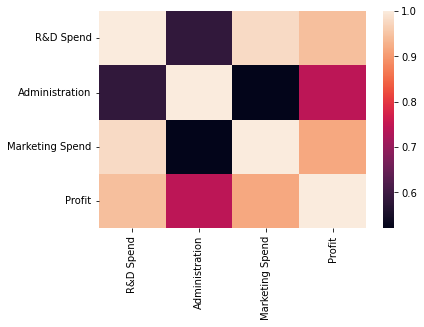

In [10]:
#DATA VISUALIZATION
#BUILDING THE CORRELATION MATRIX
sns.heatmap(companies.corr())

In [24]:
#ENCODING CATEGORICAL DATA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Apply one-hot encoding to the categorical feature(s)
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)
print(X)

[[0.0 1.0 1.0 ... 996 136897.8 471784.1]
 [1.0 0.0 0.0 ... 995 151377.59 443898.53]
 [1.0 0.0 1.0 ... 947 101145.55 407934.54]
 ...
 [1.0 0.0 0.0 ... 601 241926.31 227142.82]
 [1.0 0.0 0.0 ... 775 321652.14 281692.32]
 [0.0 1.0 1.0 ... 994 270939.86 295442.17]]


In [25]:
#AVOIDING THE DUMMY VARIABLE TRAP
X = X[:, 1:]

In [26]:
#SPLITTING THE DATA INTO TRAIN AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
#FITTING MULTIPLE LINEAR REGRESSION TO THE TRAINING SET
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
#PREDICTING THE TEST SET RESULT
y_pred = regressor.predict(X_test)
y_pred

array([ 89622.46069768,  87842.55305134,  94735.06117603, 176669.56121366,
        82643.61914814, 111801.04848311, 135056.04016296,  91291.96495689,
       164327.16255757,  53578.79149001,  67114.0118091 , 149332.22993219,
       126799.36640531,  59503.74112216, 178551.49249541,  75156.70007112,
       119168.05794539, 164036.1750327 , 169263.4776569 , 182827.5607668 ,
       118357.65723565,  84917.85182229, 181382.63623903,  83394.80080451,
       105648.55391736, 101088.48645933,  53554.17695969,  57066.32262255,
        68892.81229204, 210493.28462309, 121351.19723223, 112888.21436112,
       101799.384907  , 136816.46605785,  63772.95973932, 109998.89011469,
       186892.91523247, 172159.01876306, 175834.76272555, 118605.02954019,
        96669.07630986, 165209.84494093, 108881.02173089,  50622.53667706,
       117477.19284194,  58806.36394423, 157283.95676595,  78167.71608145,
       158880.25393449, 131153.37591566, 185343.19106032, 175739.21942814,
        93934.57177399,  

In [29]:
#CALCULATING THE COEFFICIENTS
print(regressor.coef_)

[-5.77102295e+01 -2.98964022e+02  2.98964022e+02 -2.41253793e+02
  8.09467976e+01  8.55211932e-01  1.19052449e-01]


In [30]:
#CALCULATING THE INTERCEPTS 
print(regressor.intercept_)

-52654.87107267135


In [32]:
#CALCULATING THE R SQUARED VALUE
#EVALUATING THE MODEL
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9114714505439288